In [1]:
''' Primary libraries to import '''

import numpy as np # for numerical operations
import pandas as pd # for data loading, grouping and aggregation
import matplotlib.pyplot as plt # basic plots
# import seaborn as sns # nicer visuals

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)



In [2]:
'''
Data Loading and Initial Exploration:
    - Load the dataset 
    - Display dataset structure and size
    - Display the first 5 rows and check the data types of all columns.
    - Missing values.
'''

# Loading the dataset into a pandas DataFrame

df = pd.read_csv("query-water-efficiency-data (1).csv")


In [3]:

# Create a function which store and display information related to dataset inspection

def inspect_data(filepath):
    
    df = pd.read_csv(filepath)

    print("\nFirst look at the dataset:")
    print(df.head())
    print("\nDataset shape:")
    print(f"{df.shape[0]} rows × {df.shape[1]} columns")
    print("\nData types:")
    print(df.dtypes)
    print("\nChecking for NaN values:")
    print(df.isna().sum())
    print(f"\nNumber of countries: {df['country'].nunique()}")

    countries_list = df["country"].unique()
    print("\nCountries represented in the dataset:")
    for country in countries_list:
        print(country)

    return df


# Diplay the function

df = inspect_data("query-water-efficiency-data (1).csv")

# Standardize variable names by removing the avg_ prefix to improve readability

df.columns = df.columns.str.replace("^avg_", "", regex=True) # Remove avg_
df.columns




First look at the dataset:
   country climate_region        date  hour  avg_temperature  avg_humidity  avg_wetbulb_temperature  avg_wind_speed  avg_precipitation  avg_wue_fixed  avg_wue_indirect  avg_total_renewables_twh  avg_total_fossil_twh  avg_total_energy_twh
0  Algeria  Mediterranean  2022-08-20     0            22.02          64.3                63.175698            6.04                0.0       1.641379          1.413949               5957.804724         766629.284363         772587.089087
1  Algeria  Mediterranean  2022-08-20     1            21.42          64.7                62.305006            5.32                0.0       1.635311          1.413949               5957.804724         766629.284363         772587.089087
2  Algeria  Mediterranean  2022-08-20     2            20.84          65.0                61.430778            4.58                0.0       1.628322          1.413949               5957.804724         766629.284363         772587.089087
3  Algeria  Mediterr

Index(['country', 'climate_region', 'date', 'hour', 'temperature', 'humidity', 'wetbulb_temperature', 'wind_speed', 'precipitation', 'wue_fixed', 'wue_indirect', 'total_renewables_twh', 'total_fossil_twh', 'total_energy_twh'], dtype='str')

                         start_date   end_date  coverage_days
country                                                      
Algeria                  2022-08-20 2024-08-04            716
Benin                    2022-08-20 2023-08-20            366
Botswana                 2022-08-20 2023-08-20            366
Burkina Faso             2022-08-20 2023-08-20            366
Burundi                  2022-08-20 2023-08-20            366
Cameroon                 2022-08-20 2023-08-20            366
Cape Verde               2022-08-20 2023-08-20            366
Central African Republic 2022-08-20 2023-08-20            366
Chad                     2022-08-20 2023-08-20            366
Egypt                    2022-08-20 2023-08-20            366
Equatorial Guinea        2022-08-20 2023-08-20            366
Eritrea                  2022-08-20 2023-08-20            366
Ethiopia                 2022-08-20 2023-08-20            366
Gabon                    2022-08-20 2023-08-20            366
Ghana   

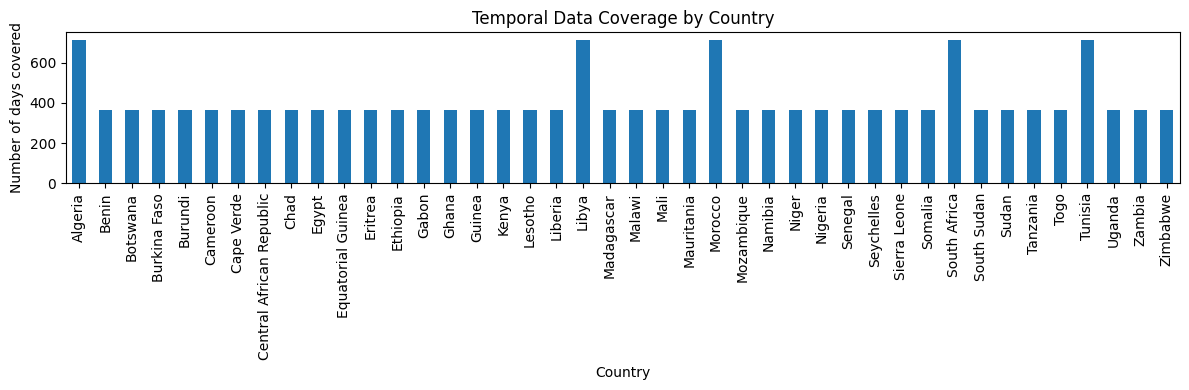

In [4]:
# Coverage days by country to understand the time span of observations per country 

df["date"] = pd.to_datetime(df["date"]) # datetime object
coverage = (
    df.groupby("country")["date"]
      .agg(start_date="min", end_date="max") # group by country and extract date range
)
coverage["coverage_days"] = (
    coverage["end_date"] - coverage["start_date"]
).dt.days + 1 # compute numbers of days covered
coverage.sort_values("coverage_days", ascending=False) # sort them by coverage lentgh

print(coverage)

# Bar chart to diplay date coverage distribution in a more visual way

coverage["coverage_days"].plot(
    kind="bar",
    figsize=(12, 4)
)

plt.ylabel("Number of days covered")
plt.xlabel("Country")
plt.title("Temporal Data Coverage by Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
"""
- Variable-Level Descriptive Analysis
    - Understand each variable independently before making any comparisons.

Focus on basic statistics, distribution and outliers detection

"""

## 1st: Define the CORE variables ##
# Why? Make the analysis repruducible 

# Main outcome variables
wue_vars = [
    "wue_fixed",
    "wue_indirect"
    ]

# Climate variables
climate_vars = [
    "temperature",
    "humidity",
    "wetbulb_temperature",
    "wind_speed",
    "precipitation"
]

# Energy variables (contextual)
energy_vars = [
    "total_fossil_twh",
    "total_renewables_twh",
    "total_energy_twh"
]

core_vars = wue_vars + climate_vars + energy_vars


## Full descriptive statistics ##

df[core_vars].describe().T

# Summary table

summary_stats = pd.DataFrame({
    "mean": df[core_vars].mean(),
    "median": df[core_vars].median(),
    "std": df[core_vars].std(),
    "min": df[core_vars].min(),
    "max": df[core_vars].max()
})

summary_stats



,mean,median,std,min,max
wue_fixed,1.631323,1.652193,0.070925,1.050693,1.706900e+00
wue_indirect,3.357300,3.237921,1.571365,0.001000,5.337428e+00
temperature,23.992963,24.100000,5.994913,-3.133333,4.470000e+01
humidity,59.338385,61.166667,22.633687,3.727273,9.914286e+01
wetbulb_temperature,64.028861,65.241135,8.681195,22.822024,8.327020e+01
wind_speed,11.440959,10.300000,5.647068,0.400000,4.320000e+01
precipitation,0.145330,0.000000,0.449682,0.000000,2.826667e+01
total_fossil_twh,189693.283338,19720.666576,459787.945579,0.000000,2.300983e+06
total_renewables_twh,64355.618851,9049.310204,95414.772786,87.596356,3.448129e+05
total_energy_twh,264300.794504,47010.881938,517443.040258,2561.125529,2.590100e+06


In [6]:
## Outliers identification ##
# - understand whether extreme values exist
# - check if they are rare and plausible
# - flag variables that may need special care later

outlier_summary = []

for col in core_vars:
    series = df[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1 # iqr = interquantile range method. It capture typical variability

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr # everything below hte lower bound or above the upper one has to be treated as an outlier

    n_outliers = ((series < lower) | (series > upper)).sum() # counts how many observations fall outside the bounds
    pct_outliers = n_outliers / len(series) * 100 # % of the data they represent

    outlier_summary.append({
        "variable": col,
        "lower_bound": lower,
        "upper_bound": upper,
        "n_outliers": n_outliers,
        "pct_outliers": pct_outliers
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df



,variable,lower_bound,upper_bound,n_outliers,pct_outliers
0,wue_fixed,1.474203,1.811572,15026,3.923565
1,wue_indirect,-2.644697,9.781257,0,0.000000
2,temperature,9.573333,38.400000,8515,2.223423
3,humidity,-10.750000,131.250000,0,0.000000
4,wetbulb_temperature,39.182645,90.440756,2669,0.696925
5,wind_speed,-3.520714,25.296429,9912,2.588206
6,precipitation,-0.125000,0.208333,60619,15.828738
7,total_fossil_twh,-172456.233210,297254.188863,40752,10.641098
8,total_renewables_twh,-152856.508674,261590.515868,35136,9.174657
9,total_energy_twh,-375811.879643,661787.057709,31968,8.347434


Outlier analysis shows that most variables have a small and expected proportion of extreme values. 
Higher outlier shares in precipitation and energy variables reflect distributional characteristics and country-level heterogeneity rather than data quality issues. 
No observations were removed at this stage

In [29]:
"""

- Temporal validation
    -Variables behaving smoothly over time?
    -Diurnal patterns make physical sense?
    -No strange jumps or aggregation artifacts exist

"""

## Compute Hourly Means

hourly_profile = (
    df.groupby("hour")[climate_vars + wue_vars].mean()
)

hourly_profile



,temperature,humidity,wetbulb_temperature,wind_speed,precipitation,wue_fixed,wue_indirect
hour,,,,,,,
0,21.505411,66.513487,62.328236,10.365610,0.163161,1.618772,3.3573
1,21.128887,67.455618,62.005124,10.232684,0.122246,1.615965,3.3573
2,20.785223,68.371427,61.716061,10.094850,0.102618,1.613349,3.3573
3,20.468106,69.265559,61.453874,9.959723,0.126361,1.610894,3.3573
4,20.205466,69.861951,61.207393,9.841310,0.097084,1.608598,3.3573
5,19.969114,70.449418,60.993537,9.723353,0.087424,1.606533,3.3573
6,19.792228,70.952175,60.848398,9.608217,0.124479,1.605019,3.3573
7,20.507008,68.046165,61.340347,10.035107,0.110086,1.609031,3.3573
8,21.987146,63.408928,62.552592,10.896789,0.093586,1.619552,3.3573


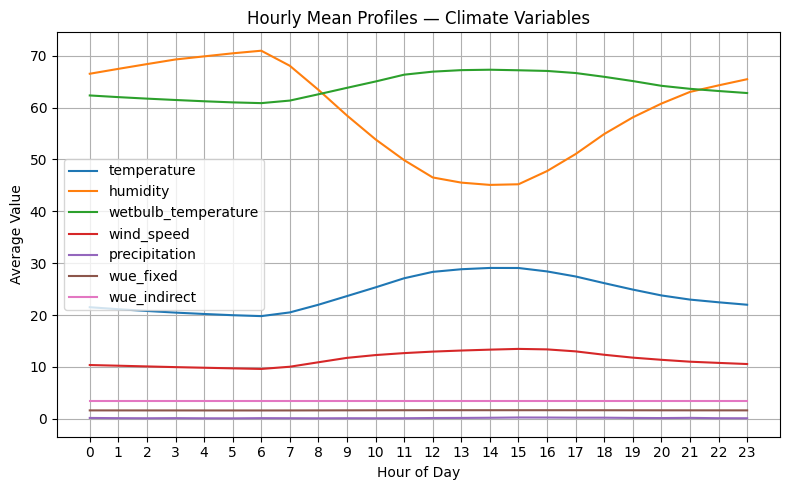

: 

In [ ]:
hourly_profile.plot(figsize=(8,5))
plt.title("Hourly Mean Profiles — Climate Variables")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()
